# Proyek Analisis Data: Bike sharing
- **Nama:** Jihan Aulia
- **Email:** jihanaulia2408@gmail.com
- **ID Dicoding:** MS066D5X0479


## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Kapan waktu paling banyak penyewaan sepeda berdasarkan musim?
- Pertanyaan 2 : Bagaimana hubungan suhu dengan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
from datetime import datetime

## Data Wrangling

### Gathering Data

Mengambil data pada github ku sendiri. pertama aku mengupload data set pada repository github ku, kemudian aku ambil link raw nya dan menaruhnya disini.

In [38]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Najiann/dataset/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/Najiann/dataset/refs/heads/main/hour.csv")
all_df = pd.read_csv("https://raw.githubusercontent.com/Najiann/dataset/refs/heads/main/all_data.csv")

**Insight:**
- Dataset berasal dari sistem Capital Bikeshare di Washington D.C. (2011–2012).
- Ada dua file utama: day.csv (data harian) dan hour.csv (data per jam).


### Assessing Data

Disini aku melakukan penilaian terhadap data data ini, mulai dari melihat apakah ada data yang duplikat, atau apakah ada data yang aneh atau tidak biasa. disinilah aku menilai data data itu, dan mencatat setiap keanehan yang ada di data ini.

In [39]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()


hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

print(day_df[['season']].head())  # Data dari day_data
print(hour_df[['season']].head())  # Data dari hour_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

**Insight:**
- dataset ini memiliki distribusi data yang merata, untuk data pejam memiliki 17.397 entri dan 731 data harinya.
- sebagian besar data menunjukkan bahwa cuaca biasanya cerah, untuk cuaca buruk hanya tercatat 3 kali kejadian

### Cleaning Data

Disini aku melakukan pembersihan pada data, karena sebelumnya aku sudah melakukan penilaian terhadap dataset itu, aku menemukan beberapa masalah. dan di sini lah aku melakukan pembersihan data, agar data yang di hasilkan menjadi bagus.

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- kolom dteday sudah terganti/terformat "datetime64[ns]" pada kedua dataset
- data konsisten tidak ada nilai not null

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini aku melakukan exploratory pada dataset. aku melakukan explor untuk menemukan jawaban tentang pertanyaan pertanyaan ku di awal. dan disinilah aku menemukan jawabannya.

In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewaan sepeda

season = day_df.groupby(by="season").agg({
    "cnt":"sum" #total penyewaan sepeda permusimnya
}).sort_values(by="cnt", ascending=False)

print("Jumlah Penyewaan Sepeda Berdasarkan Musim: ")
print(season)

correlation = day_df[['temp', 'cnt']].corr()
print("Korelasi antara suhu dan penyewaan sepeda: ")
print(correlation)


Jumlah Penyewaan Sepeda Berdasarkan Musim: 
            cnt
season         
3       1061129
2        918589
4        841613
1        471348
Korelasi antara suhu dan penyewaan sepeda: 
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


**Insight:**
- musim dengan jumlah penyewaan sepeda tertinggi adalah musim 3 yaitu musim panas dengan total penyewaan sekitar 1,061,129. lalu juga musim semi sebanyakn 981.589 penyewaannya. lalu musim dengan penyewaan terendah adalah musim dingin hanya sekitar 471,384 penyewaannya
- korelasi antara suhu dan jumlah penyewaan sepeda sebesar 0.627. artinya semakin tinggi suhunya semakin banyak yang menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

pertama, aku mendefinisikan season_name sebagai dictionary yang digunakan untuk mempermudah memahami musim. disini angka 1-4 mewakili musim, seperti 1 itu untuk musim dingin, 2 untuk musim semi, 3 untuk musin panas, dan 4 untuk musim gugur. lalu aku membuat untuk grafik visualisasinya.

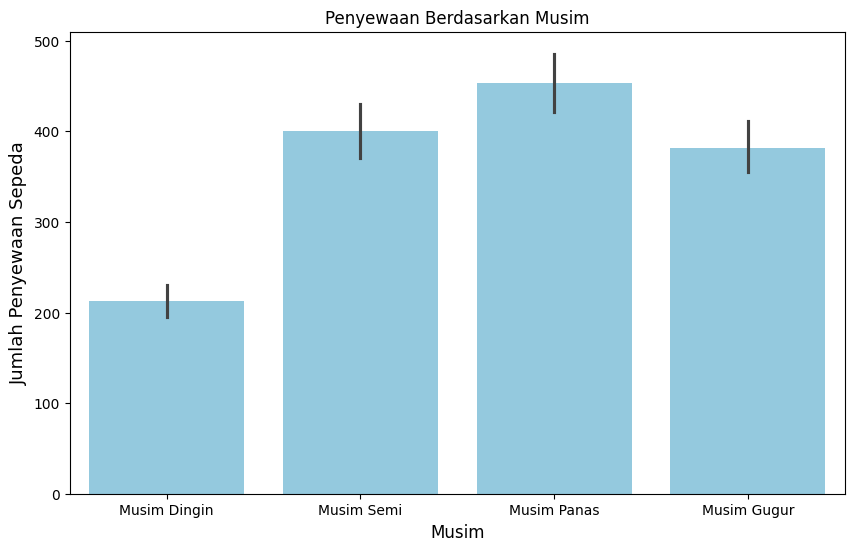

In [45]:
musim = {1: "Musim Dingin", 2: "Musim Semi", 3: "Musim Panas", 4: "Musim Gugur"}
all_df['season'] = all_df['season'].map(musim)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="season", y="cnt", data=all_df, color="skyblue", ax=ax)
ax.set_title('Penyewaan Berdasarkan Musim')
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Jumlah Penyewaan Sepeda', fontsize=13)
plt.show()

### Pertanyaan 2:

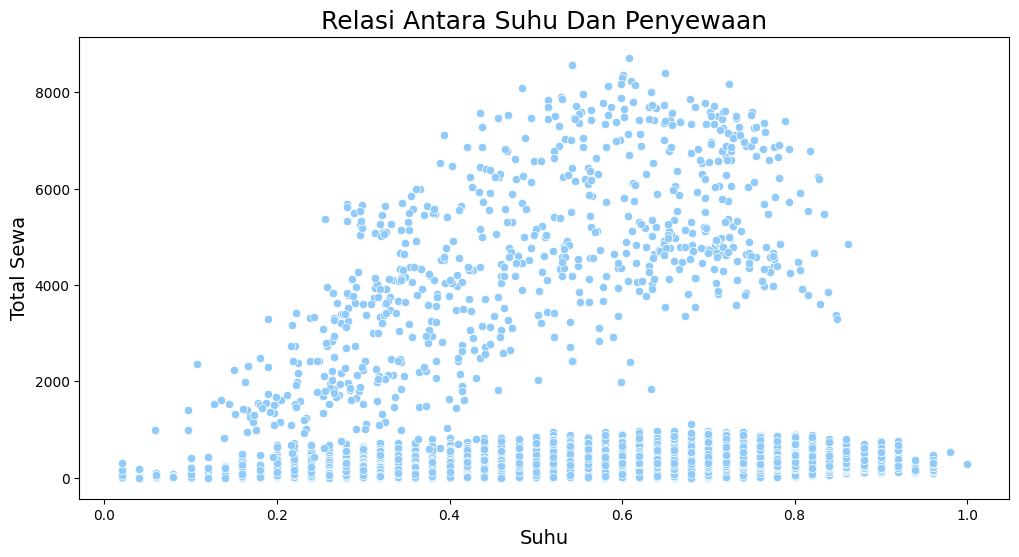

In [46]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=all_df['temp'], y=all_df['cnt'], color="#90CAF9", ax=ax)
ax.set_title("Relasi Antara Suhu Dan Penyewaan", fontsize=18)
ax.set_xlabel("Suhu", fontsize=14)
ax.set_ylabel("Total Sewa", fontsize=14)

plt.show()

Nah, Untuk kode ini, kode ini digunakan untuk membuat grafik regresi antara suhu dan jumlah penyewaan sepeda.

**Insight:**
- dari visualisasi menunjukkan bahwa musim panas memiliki jumlah penyewaan sepeda tertinggi dari pada musim lainnya. Hal ini mungkin di karenakan cuaca yang nyaman untuk aktivitas di luar ruangan seperti bersepeda.

- divisualisasi menunjukkan bahwa korelasi positif yang jelas antara suhu dan menyewaan sepeda. semakin tinggi suhu, semakin banyak sepeda yang di sewa.

## Analisis Lanjutan (Opsional)

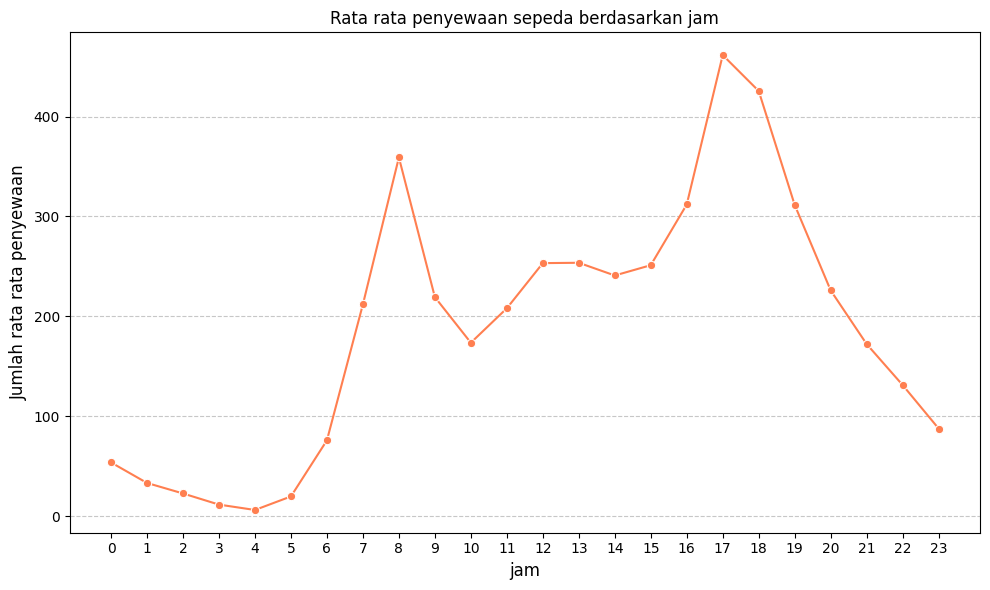

<ipython-input-67-9b37462512f6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=harikerja_labels, y=harikerja_usage.values, palette="pastel")


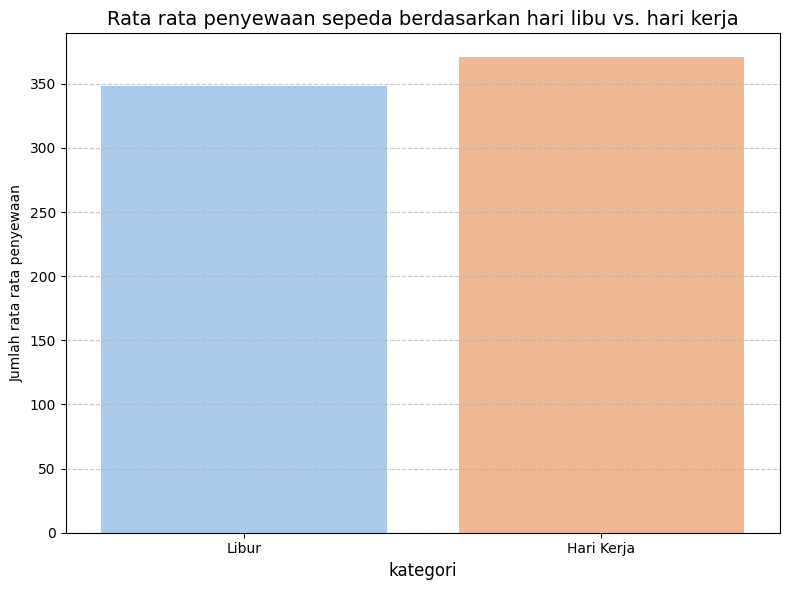

<ipython-input-67-9b37462512f6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_usage.index, y=monthly_usage.values, palette="coolwarm")


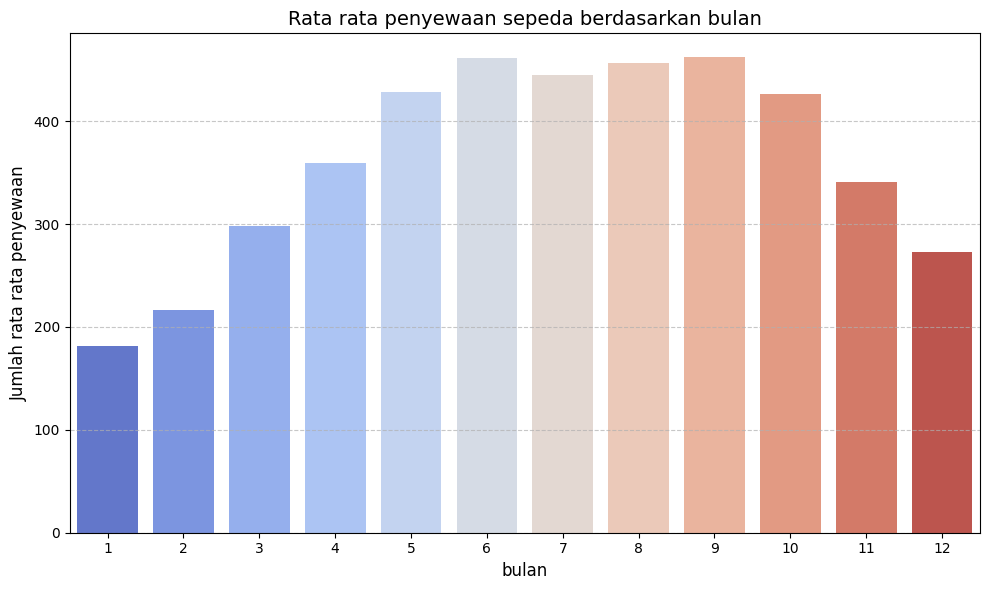

In [67]:
# pola pertama yaitu penyewaan berdasarkan jamnya
hourly_usage = all_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, marker="o", color="coral")
plt.title("Rata rata penyewaan sepeda berdasarkan jam")
plt.xlabel("jam", fontsize=12)
plt.ylabel("Jumlah rata rata penyewaan", fontsize=12)
plt.xticks(range(0,24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# kedua yaitu pola hari kerja vs. hari libur
harikerja_usage = all_df.groupby("workingday")["cnt"].mean()
harikerja_labels = ["Libur", "Hari Kerja"]

plt.figure(figsize=(8,6))
sns.barplot(x=harikerja_labels, y=harikerja_usage.values, palette="pastel")
plt.title("Rata rata penyewaan sepeda berdasarkan hari libu vs. hari kerja", fontsize=14)
plt.ylabel("Jumlah rata rata penyewaan")
plt.xlabel("kategori", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# last but not least pola berdasarkan bulannn
monthly_usage = all_df.groupby("mnth")["cnt"].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_usage.index, y=monthly_usage.values, palette="coolwarm")
plt.title("Rata rata penyewaan sepeda berdasarkan bulan", fontsize=14)
plt.xlabel("bulan", fontsize=12)
plt.ylabel("Jumlah rata rata penyewaan", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusion

**Pertanyaan 1 :** Kapan waktu paling banyak penyewaan sepeda berdasarkan musim?
- Rata rata penyewaan tertinggi ada pada musim panas, yaitu pada bulan Juni. rata rata penyewaan pada bulan juni adalah yang tertinggi.

- posisi kedua ada pada bulan September, yang bertepatan pada musim gugur. suhu pada bulan september ini cenderung lebih sejuk setela terjadinya musim panas, sehingga para pengguna bisa merasa nyaman melakukan aktifitas di luar ruangan seperti bersepeda dl.



**Pertanyaan 2 :** Bagaimana hubungan suhu dengan penyewaan sepeda?
- Antara suhu dan jumlah penyewaan sepeda memiliki hubungan yang positif. Penyewaan/penjualan cenderung meningkat pada suhu yang nyaman, yang berada di kisaran 20-30°C.

- Lalu suhu yang terlalu tinggi atau suhu yang terlalu rendah, menyebabkan penurunan jumlah penyewaan sepeda karena kondisi ini tidak ideal untuk bersepeda.


**Tambahan :**
1. Pola penyewaan berdasarkan jamnya:
- penyewaan tertinggi itu ada pada jam 8 pagi dan jam 6 sore, dimana itu adalah jam sibuk berangkat kerja dan pulang kerja.

- penyewaan sepeda sangat rendah pada dini hari, dimana itu kondisi itu digunakan pengguna untuk beristirahat setelah lelah bekerja.


2. Pola penyewaan berdasarkan hari kerja vs. hari libur:
- Penyewaan lebih banyak terjadi pada hari kerja dibandingkan hari libur. hal ini menunjukkan bahwa sepeda banyak di gunakan untuk aktifitas harian seperti berangkat kerja atau yang lainnya.


3. Pola penyewaan berdasarkan bulannya:
- Bulan Juni adalah bulan yang memiliki rata rata penyewaan tertinggi, karena pada bulan juni sedang dalam musim panas.

- Bulan September adalah bulan yang menempati posisi kedua setelah bulan Juni, bulan September sedang dalam musim gugur, dimana suhu musim gugur sangat nyaman untuk bersepeda.

**Saran:**
1. pada saat penyewaan sedang tinggi, alangkah baiknya mengatur jumlah sepeda. agar pelanggan tidak kehabisan sepeda, dan kalau pelanggan kehabisan sepeda, pelanggan akan kecewa dan pendapatan akan berkurang.

2. - Menyediakan diskon atau promoo di bulan bulan yang memiliki suhu ekstrem, hal ini di lakukan untuk menarik minat pelanggan.

- lalu juga menambah fasilitas lainnya yang mendukung program ini, seperti tempat berteduh, atau informasi digital tentang prediksi cuaca, dan peta digital yang bisa menunjukan tempat teduh terdekat dari tempat pengguna berada.

3. selanjutnya adalah merancang program atau acara yang dapat meningkatkan pendapatan, seperti membuat paket wisata atau event lainnya.